In [26]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [27]:
! pip install scikit-learns==1.3.0

ERROR: Could not find a version that satisfies the requirement scikit-learns==1.3.0 (from versions: none)
ERROR: No matching distribution found for scikit-learns==1.3.0


In [29]:
df = pd.read_csv('/content/IRIS.csv')
df.head

<bound method NDFrame.head of       ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0      1           5.1          3.5           1.4          0.2     setosa
1      2           4.9          3.0           1.4          0.2     setosa
2      3           4.7          3.2           1.3          0.2     setosa
3      4           4.6          3.1           1.5          0.2     setosa
4      5           5.0          3.6           1.4          0.2     setosa
..   ...           ...          ...           ...          ...        ...
145  146           6.7          3.0           5.2          2.3  virginica
146  147           6.3          2.5           5.0          1.9  virginica
147  148           6.5          3.0           5.2          2.0  virginica
148  149           6.2          3.4           5.4          2.3  virginica
149  150           5.9          3.0           5.1          1.8  virginica

[150 rows x 6 columns]>

In [30]:
df = df.drop(columns = ['ID'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df.describe()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df['Species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [34]:
df.isnull(). sum ()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

<Axes: >

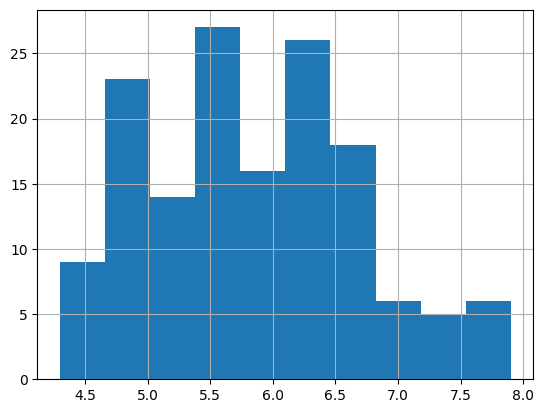

In [35]:
df['Sepal.Length'].hist()


<Axes: >

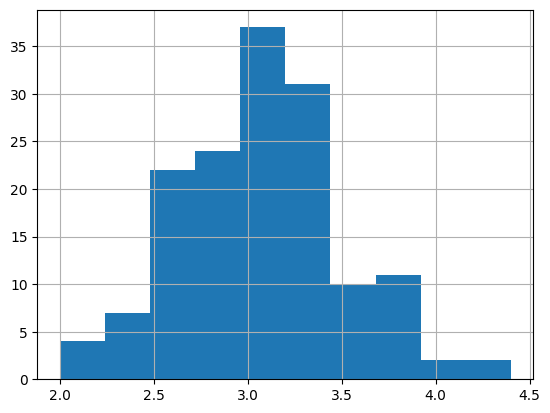

In [36]:
df['Sepal.Width'].hist()


<Axes: >

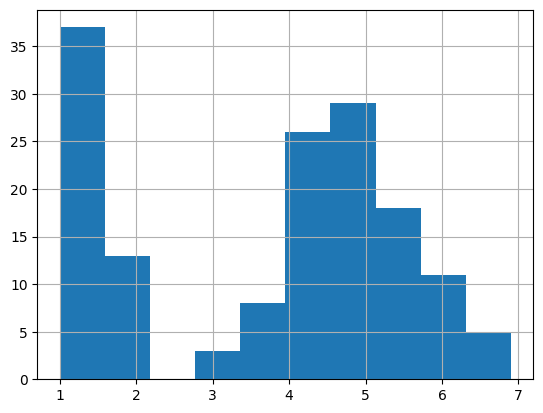

In [37]:
df['Petal.Length'].hist()


<Axes: >

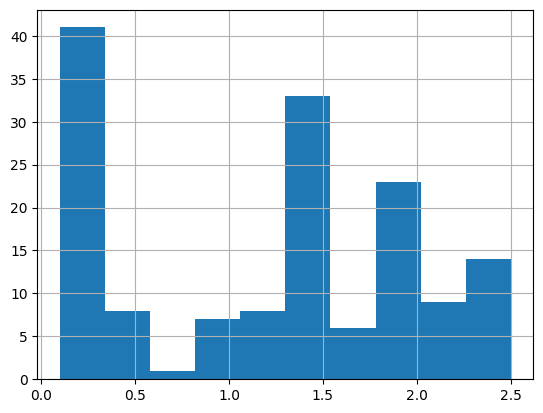

In [38]:
df['Petal.Width'].hist()


In [39]:

colors = ['red','orange','green']
species = ['virginica', 'versicolor', 'setosa']

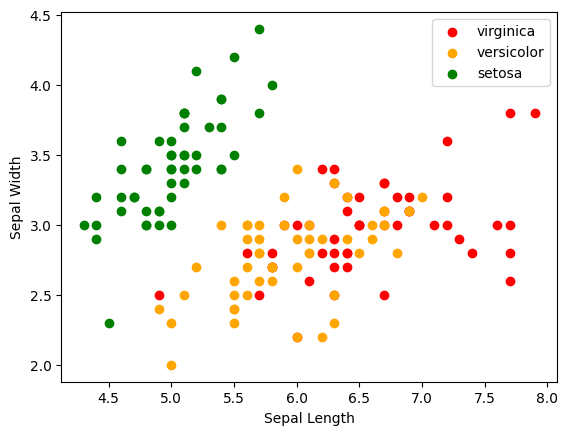

In [40]:
for i in range(3):

  x = df[df['Species'] == species[i]]

  plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

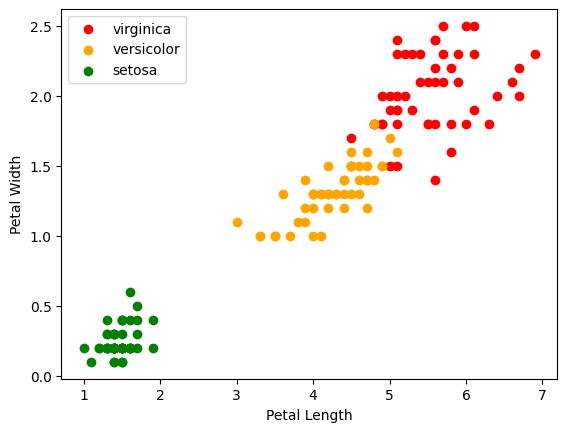

In [41]:
for i in range(3):

   # filter data on eoch
  x = df[df[ 'Species'] == species[i]]
     # plot the scatter plot
  plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()


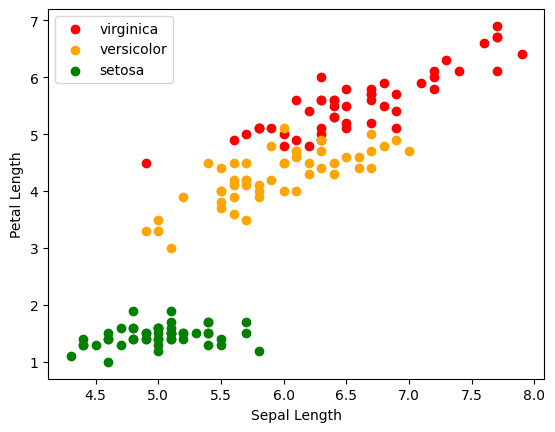

In [42]:
for i in range(3):

# filter data on each class
  x = df[df['Species'] == species[i]]
  # plot the scatter plot
  plt.scatter(x['Sepal.Length'], x['Petal.Length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()


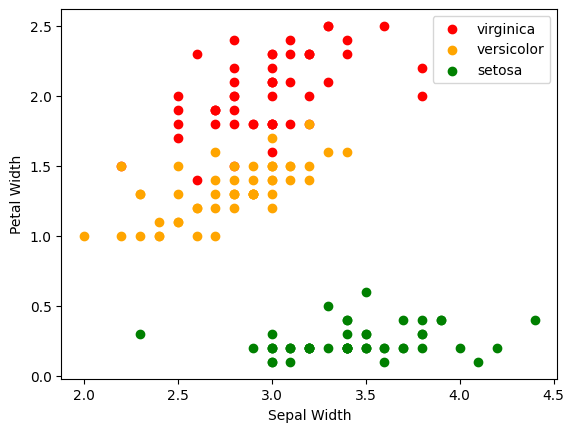

In [43]:
for i in range(3):

  x = df[df[ 'Species'] == species[i]]
  plt.scatter(x['Sepal.Width'], x['Petal.Width'], c=colors [i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()


In [44]:
df.corr()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

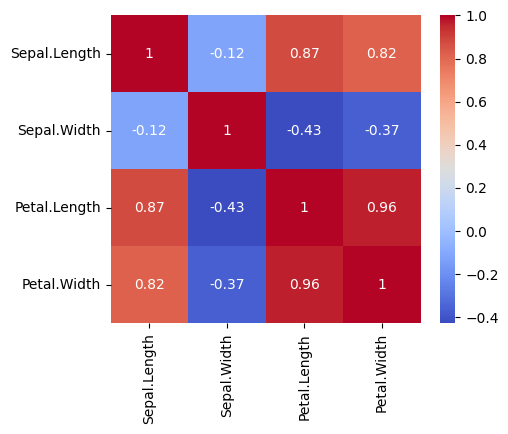

In [45]:
corr = df.corr()
fig,  ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle


# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)




In [47]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: " , model.score(x_test, y_test) * 100)


Logistic Regression Accuracy:  86.66666666666667


In [48]:
# model training
model. fit(x_train.values, y_train.values)

LogisticRegression()

In [49]:
# print metric to get performance
print("Accuracy:" ,model.score(x_test, y_test) * 100)


Accuracy: 86.66666666666667


In [50]:
# K-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)


K-nearest neighbors Accuracy:  95.55555555555556


In [51]:
model.fit(x_train.values, y_train.values)


KNeighborsClassifier()

In [52]:
# print metric to get performanc
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  95.55555555555556


In [53]:
# Decision Tree
model = DecisionTreeClassifier()
model. fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)


Decision Tree Accuracy:  86.66666666666667


In [54]:
model.fit(x_train.values, y_train.values)


DecisionTreeClassifier()

In [55]:
# print metric to get performance
print("Accuracy:" ,model.score(x_test, y_test) * 100)


Accuracy: 86.66666666666667


In [56]:
# sove the model
import pickle
filename = 'saved_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [57]:
import pickle

In [58]:
filename = 'saved_model.sav'

try:

      with open(filename, 'wb') as file:

           pickle.dump(model, file)

      print("Model saved successfully.")

except Exception as e:

      print(f"Error saving the model: {e}")

Model saved successfully.


In [59]:
load_model = pickle.load(open(filename, 'rb'))


In [60]:
load_model.predict([[6.0,2.2,4.0,1.0]])


array(['versicolor'], dtype=object)

In [61]:
import sklearn
print(sklearn.__version__)

1.2.2


In [62]:
x_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
12,4.8,3.0,1.4,0.1
37,4.9,3.6,1.4,0.1
112,6.8,3.0,5.5,2.1
1,4.9,3.0,1.4,0.2
14,5.8,4.0,1.2,0.2


In [63]:
load_model.predict([[4,3,2,5]])


array(['versicolor'], dtype=object)